## Proyecto 2

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class Nodo:
    #Inicializamos los atributos de la clase
    def __init__(self, vecinos, estado):
        self.vecinos = np.array(vecinos,dtype=np.int32)
        ##Define el estado
        #0=Susceptible
        #1=Infectado
        #2=Susceptible recuperado
        #3=Vacunado
        self.estado = estado
    #Métodos de la clase
    def AddNodo(self,ni): #Añade una conexión al nodo
        if(ni not in self.vecinos):
            self.vecinos=np.append(self.vecinos,ni)
        return False
    def GetNumVecinos(self): #Cuenta el número de vecinos del nodo
        return np.size(self.vecinos)

In [47]:
#Creamos una red de Erdos-Renyi
class RedER:
    #Inicializamos los atributos de la clase
    def __init__(self, Nt,M,a1,a2,b,I0,V0):
        self.Nt = Nt
        self.nd = []
        self.M=M
        self.a1=a1
        self.a2=a2
        self.b=b
        self.I0=I0
        self.V0=V0
        for i in range(self.Nt):
            self.nd.append(Nodo([],0))
        for i in range(self.M):
            j,k=self.ErdosRenyi(self.Nt)
            self.nd[k].AddNodo(j)
            self.nd[j].AddNodo(k)
        rng = np.random.default_rng()
        ninf=rng.choice(self.Nt, int(I0*self.Nt))
        nvac=rng.choice(self.Nt, int(V0*self.Nt))
        for i in ninf:
            self.nd[i].estado=1
        for i in nvac:
            self.nd[i].estado=3
    def ErdosRenyi(self,N):
        i1=int(N*np.random.rand())
        i2=int(N*np.random.rand())
        return i1,i2
    def GuardaRed(self):
        f=open("f:/OneDrive/Clases UNAM/Complejos/Tarea3/RedER1.tgf", 'w+')
        for i in range(self.Nt):
            f.write(str(i)+"\t"+str(i)+"\n")
        f.write("#\n")
        for i in range(self.Nt):
            k=self.nd[i].GetNumVecinos()
            for j in range(k):
                iv=self.nd[i].vecinos[j]
                f.write(str(i)+"\t"+ str(iv)+"\n")
        f.close()
        #Para los cambios entre dos personas
    def SIS(self):
        for i in range(self.Nt):
            nodo1=self.nd[i].estado
            if(nodo1==1 and np.random.rand()<self.b):
                    self.nd[i].estado=2
            for j in range(self.Nt):
                nodo2=self.nd[j].estado
                if(i in self.nd[j].vecinos):
                    if(nodo1==1 and nodo2==0):
                        if(np.random.rand()<self.a1):
                            self.nd[j].estado=1
                    if(nodo1==1 and nodo2==2):
                        if(np.random.rand()<self.a2):
                            self.nd[j].estado=1
                else:
                    pass
    def CuentaInf(self):
        contI=0
        for i in range(self.Nt):
            if(self.nd[i].estado==1):
                contI+=1
        return contI

In [38]:
#Creamos una red de Barabási-Albert
class RedEP:
    #Inicializamos los atributos de la clase
    def __init__(self, Nt,a1,a2,b,I0,V0):
        self.Nt=Nt
        self.nd = []
        self.a1=a1
        self.a2=a2
        self.b=b
        self.I0=I0
        self.V0=V0
        for i in range(self.Nt):
            self.nd.append(Nodo([],0))
        for i in range(self.Nt):
            j=self.EnlacePreferencial(i)
            self.nd[i].AddNodo(j)
            self.nd[j].AddNodo(i)
        rng = np.random.default_rng()
        ninf=rng.choice(self.Nt, int(I0*self.Nt))
        nvac=rng.choice(self.Nt, int(V0*self.Nt))
        for i in ninf:
            self.nd[i].estado=1
        for i in nvac:
            self.nd[i].estado=3
    #Métodos de la  red    
    def EnlacePreferencial(self,N):
        j=0
        F=np.zeros(N+1)
        s=0
        for t in range(N):
            s+=self.nd[t].GetNumVecinos()
        F[0]=0
        for  t in range(1,N+1):
            F[t]+=F[t-1]+1.0*self.nd[t-1].GetNumVecinos()/s
        x=np.random.rand()
        for t in range(1,N+1):
            if(F[t-1]<=x and x>=F[t]):
                j=t-1
        return j
    def GeneraPK(self):
        P=np.zeros(self.Nt)
        kmax=0
        for i in range(self.Nt):
            k=self.nd[i].GetNumVecinos()
            if(k>kmax):
                kmax=k
            P[k]+=1
        return P,kmax
    def GuardaRed(self,file):
        f=open("f:/OneDrive/Clases UNAM/Complejos/Tarea3/"+file+".tgf", 'w+')
        for i in range(self.Nt):
            f.write(str(i)+"\t"+str(i)+"\n")
        f.write("#\n")
        for i in range(self.Nt):
            k=self.nd[i].GetNumVecinos()
            for j in range(k):
                iv=self.nd[i].vecinos[j]
                f.write(str(i)+"\t"+ str(iv)+"\n")
        f.close()
    #Para los cambios entre dos personas
    def SIS(self):
        for i in range(self.Nt):
            nodo1=self.nd[i].estado
            if(nodo1==1 and np.random.rand()<self.b):
                    self.nd[i].estado=2
            for j in range(self.Nt):
                nodo2=self.nd[j].estado
                if(i in self.nd[j].vecinos):
                    if(nodo1==1 and nodo2==0):
                        if(np.random.rand()<self.a1):
                            self.nd[j].estado=1
                    if(nodo1==1 and nodo2==2):
                        if(np.random.rand()<self.a2):
                            self.nd[j].estado=1
                else:
                    pass
    def CuentaInf(self):
        contI=0
        for i in range(self.Nt):
            if(self.nd[i].estado==1):
                contI+=1
        return contI

In [30]:
def Prevalencia(inf):
    prom=np.sum(inf[-20:])/20
    return prom

Para Enlace Preferencial

In [31]:
redEP=RedEP(500,0.3,0.1,0.1,0.1,0)#Empieza con el 10% de contagiados

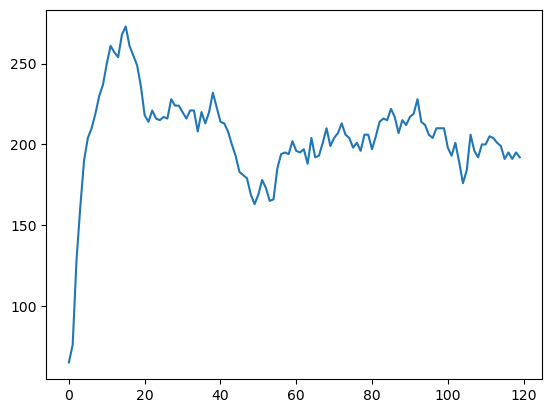

In [32]:
contI=np.array([])
for t in range(120):
    redEP.SIS()
    cI=redEP.CuentaInf()
    contI=np.append(contI,cI)
plt.plot(range(120),contI)
plt.savefig("Inf0.pdf")

In [33]:
vac=np.arange(10)/10
prev=np.array([])
for i in vac:
    contI=np.array([])
    redEP=RedEP(500,0.3,0.1,0.1,0.1,i)
    for t in range(120):
        redEP.SIS()
        cI=redEP.CuentaInf()
        contI=np.append(contI,cI)
    prev=np.append(prev,Prevalencia(contI))

In [34]:
print(prev)

[204.9  162.8  106.2  106.95   9.15  65.65  54.95   0.     3.35   0.  ]


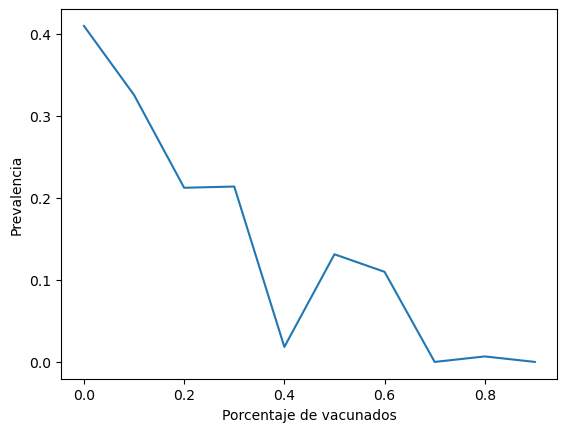

In [ ]:
plt.plot(vac,prev/500)
plt.xlabel('Porcentaje de vacunados')
plt.ylabel('Prevalencia')
plt.savefig('PrevEP.pdf')

In [49]:
redER=RedER(500,1000,0.3,0.1,0.1,0.1,0)#Empieza con el 10% de contagiados

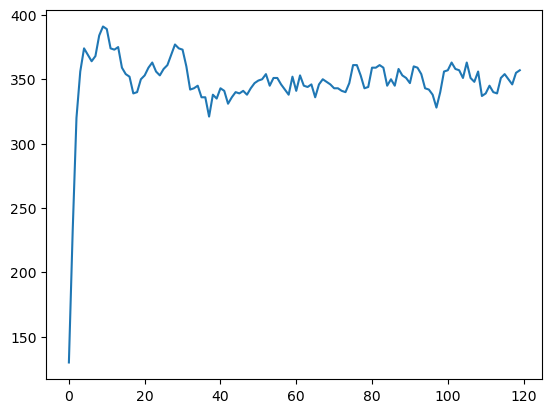

In [50]:
contI=np.array([])
for t in range(120):
    redER.SIS()
    cI=redER.CuentaInf()
    contI=np.append(contI,cI)
plt.plot(range(120),contI)
plt.savefig("Inf0.pdf")

In [58]:
vac=np.arange(10)/10
prevER=np.array([])
for i in vac:
    contI=np.array([])
    redER=RedER(500,1000,0.3,0.1,0.1,0.1,i)
    for t in range(120):
        redER.SIS()
        cI=redER.CuentaInf()
        contI=np.append(contI,cI)
    prevER=np.append(prevER,Prevalencia(contI))

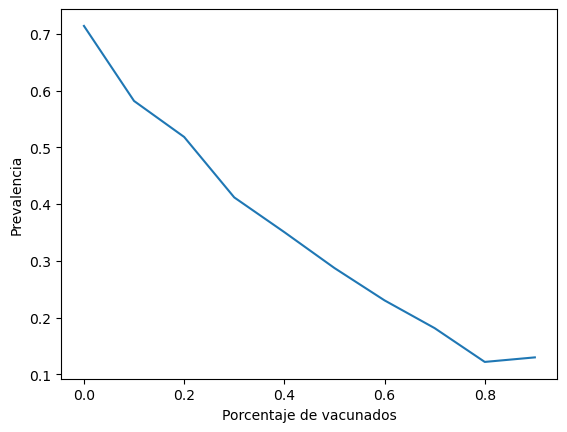

In [60]:
plt.plot(vac,prevER/500)
plt.xlabel('Porcentaje de vacunados')
plt.ylabel('Prevalencia')
plt.savefig('PrevER.pdf')